<a href="https://colab.research.google.com/github/Chetan1207/EDA-Project-on-AirBNB/blob/main/Copy_of_Capstone_AirBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -** EDA of Airbnb Bookings Analysis

---



Project Type - EDA Capston (Airbnb)

# **CONTRIBUTION**

---

Individual - Chetan Prakash

# **Project Summary -**

---


Airbnb is a popular online platform that allows individuals to rent out their homes, apartments, and other properties to travelers looking for accommodations. The company collects and publishes data on its listings and reservations, which is available for analysis and research purposes.

The Airbnb data set contains information on listings, hosts, guests, and reservations from cities around the world. The data set includes detailed information such as location, property type, room type, price, availability, ratings, and reviews.

Some common analyses of the Airbnb data set include:


1.   Price analysis: examining the distribution of prices for different types of listings and in different locations. 
Availability analysis: examining the availability of listings throughout the 
year and the effect of seasonality on pricing and occupancy.
2.   Reviews analysis: examining the ratings and reviews left by guests and their impact on listing popularity and pricing. Host analysis: examining the characteristics and behaviors of hosts, such as their response rates, communication style, and booking preferences.
3.   Geospatial analysis: visualizing the distribution of listings on a map and examining patterns of concentration and dispersion across different neighborhoods and cities.
4.   Host analysis: examining the characteristics and behaviors of hosts, such as their response rates, communication style, and booking preferences.
5.   Geospatial analysis: visualizing the distribution of listings on a map and examining patterns of concentration and dispersion across different neighborhoods and cities.







---



# **Problem Statement :**


1.   How to deal with all the duplicate and null values?
2.   Find the mean and median value of all numeric column so get idea where all numeric value lies?

3.   Are private rooms preferred over other room types?
4.   How many hotel available 365 days? And top 10 hotels name on the basis of highest availability for the whole year?

1.   Is there any correlation between all the numerical data?
2.   Is the Manhattan neighborhood preferred over other neighborhoods?

1.   For Each Neighborhood count how many of guests prefer the same location?
2.   What are the average prices according to their prices?

1.   Which one is the best rating hotels according to its price?
2.   How many minimum nights people should pay per host?

1.   Which one is the most busiest hosts and why?
2.   Which area get highest number of reviews?

1.   Distribution of listings across the neighborhood?
2.   Room type availability according to their percentage?

1.   Which one is the top location according to neighbourhood in percentage?
2.   Most demanding host according to theri availability?





















# **Github Link**
 https://github.com/Chetan1207/EDA-Project-on-AirBNB.git

In [ ]:
# Installing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import warnings # Avoid warning
warnings.filterwarnings('ignore')


In [ ]:
# import dataset from drive
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/AlmaBetter/Capstone Project 1/AirBnb dataset/Airbnb NYC 2019 (1).csv'
df = pd.read_csv(file_path) 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape # checking number of rows and column

(48895, 16)

In [ ]:
df.head() # checking top 5 rows

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.columns # all the column name

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.info() # information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

So we have 10 numerical column and 5 categorical

In [ ]:
df.duplicated().sum() # we don't have any duplicate value in the dataset

0

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
column_numerical = df.describe().columns # to find numeric columns name 
column_numerical

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
df.tail() # last 5 rows of dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
df.isnull().sum() # finding the number of null values present in dataset

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df1 = df.copy() # make copy of dataset so that original dataset does not effected

In [ ]:
df1.fillna({'last_review':'No Review'}, inplace=True)# fill all the null values in Last review as No Review
df1.fillna({'name':'No Name'}, inplace=True) # fill all the null values in name as No Name
df1.fillna({'host_name':"No Name"}, inplace=True) # fill all the null values in host name as No Name
df1.fillna(0,inplace=True) # fill all the null values with 0


In [ ]:
df1.isnull().sum() # checking any null value left

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

we deal all the null values now no null values

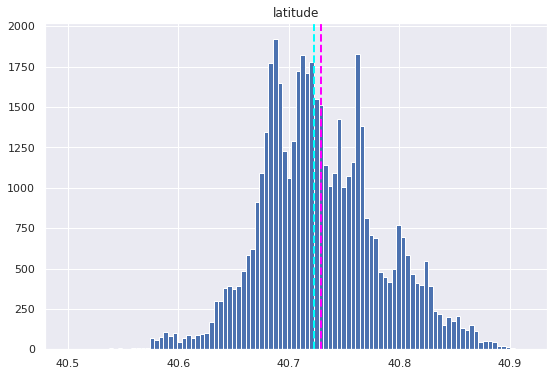

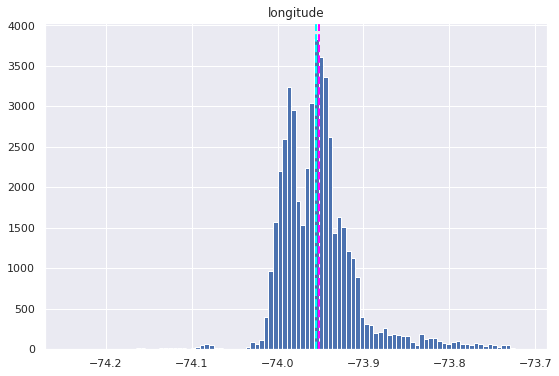

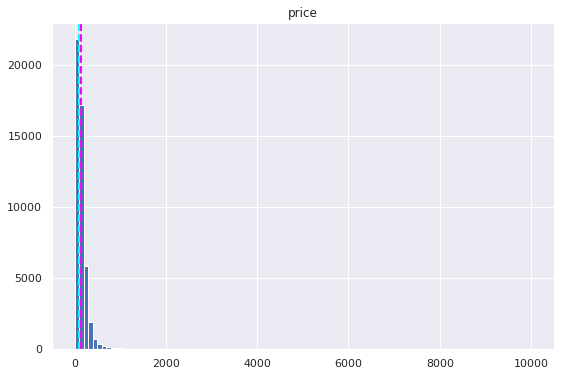

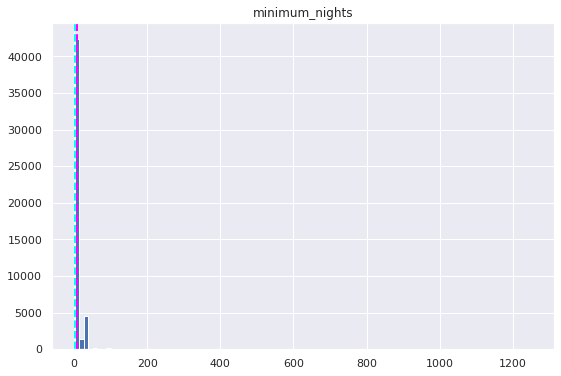

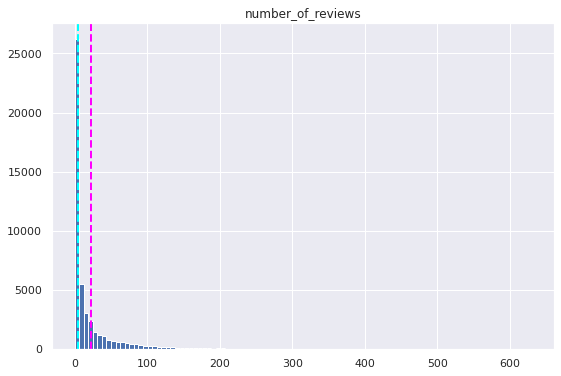

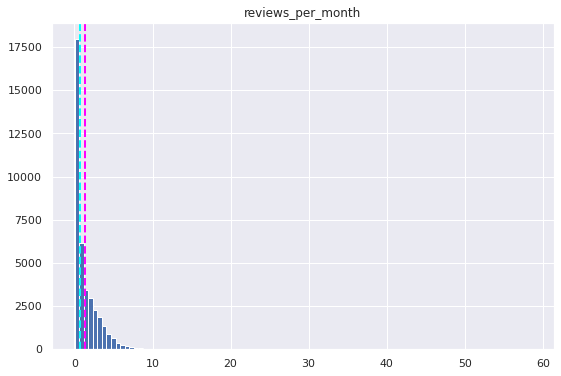

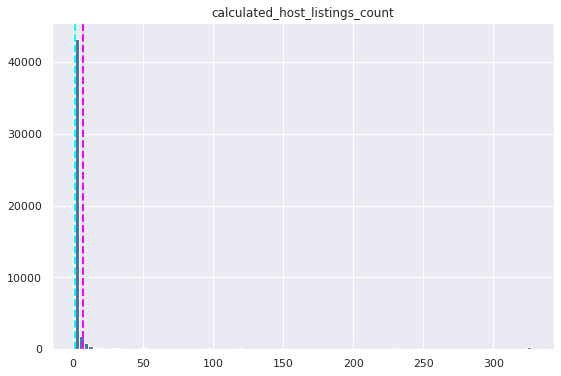

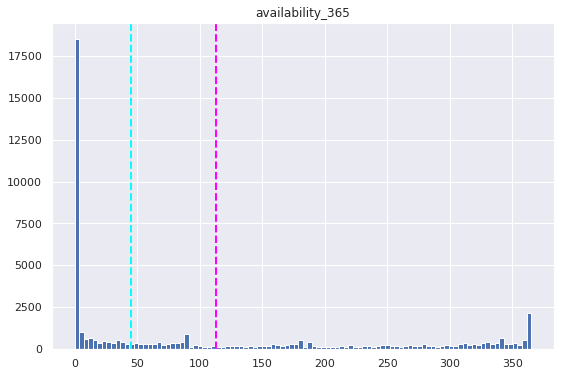

In [ ]:
for column in column_numerical[2:]: # this chart shows the mean and median of all values
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df[column]
   feature.hist(bins=100, ax = ax)
   ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
   ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
   ax.set_title(column)
plt.show()

Median as well Mean tell use the avg value of all the column and median tell 50% of the value so the general all the values lie between them.
due to this we can findout the general idea of all the values like avg of pricing, minimum nights, reviews etc.

In [ ]:
# Are private rooms preferred over other room types?
df1['room_type'].value_counts() # so according to this people preferred  more Entire home/apt room compare to others.

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
# How many hotel available 365 days? And top 10 hotels name on the basis of highest availability for the whole year?
df2=df1[df1['availability_365']==365]
df2['name'].value_counts().sum() # total number of host available for 365 days

1295

In [ ]:
# This tells about available host namewho open for 365 days with the room types
hosts_available_365days = df1.groupby(['name','room_type','host_id'])['availability_365'].max().reset_index() 
hosts_available_365days.sort_values(by='availability_365',ascending=False).head(10)

,name,room_type,host_id,availability_365
22631,Historical Central Park stay,Private room,187872824,365
20804,Gorgeous Private Studio near Central Park,Entire home/apt,191976506,365
20971,Gorgeous studio in midtown Manhattan,Entire home/apt,120762452,365
4807,Awesome Budget Private Room with 2 Beds,Private room,219544415,365
43516,Sunny private room 10 minutes from Times Sq. 53E3,Private room,190921808,365
20959,Gorgeous single room in Sunnyside near Manhattan,Private room,75458625,365
20942,Gorgeous private bedroom in the 2 bd apt,Private room,46343506,365
43568,Sunny room in Manhattan ☀️,Private room,88827816,365
20867,Gorgeous Two Bedroom Apartment Columbias Campus,Private room,59268420,365
30569,New York Moments (Ladies Only),Shared room,223248121,365


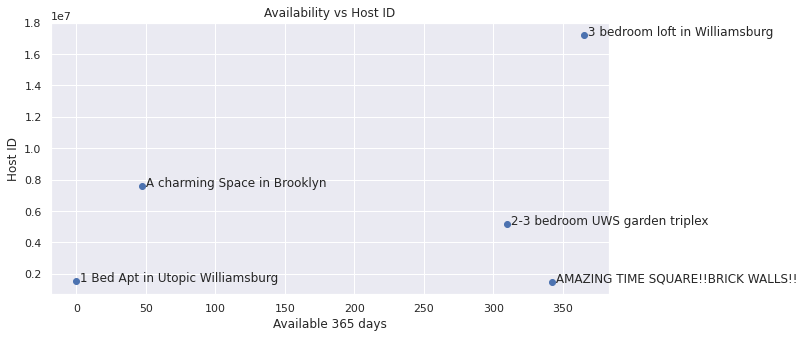

In [ ]:
id = hosts_available_365days['host_id'].head(5)
availability = hosts_available_365days['availability_365'].head(5)
names = hosts_available_365days['name'].head(5)

fig, ax = plt.subplots(figsize = (10, 5))

# creating the scatter plot
ax.scatter(availability, id)

# adding labels to data points
for i, txt in enumerate(names):
    ax.annotate(txt, (availability[i], id[i]))

plt.xlabel("Available 365 days")
plt.ylabel("Host ID")
plt.title("Availability vs Host ID")
plt.show()

<Axes: >

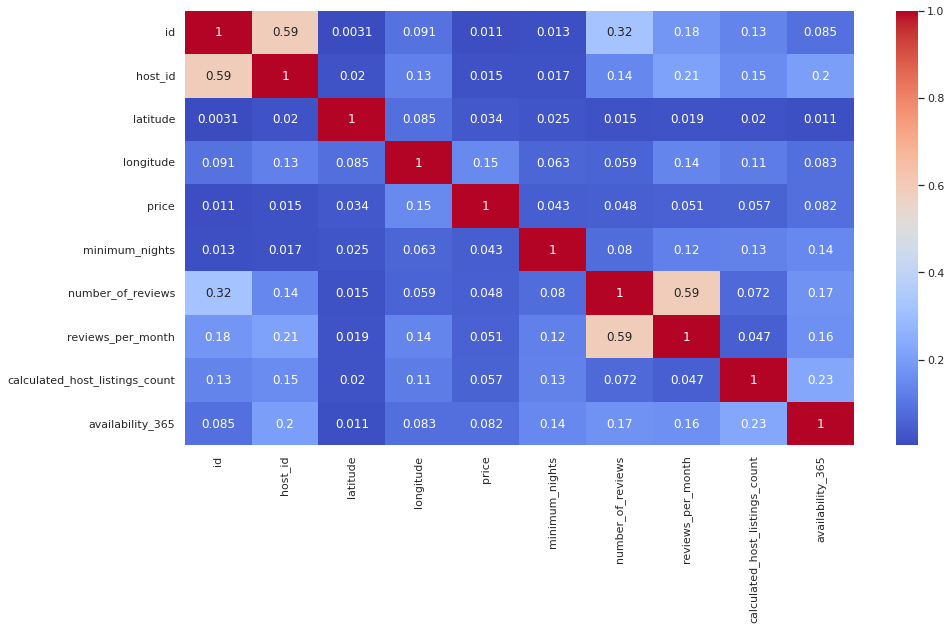

In [ ]:
# Correlation between all the numerical data
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

So as we can see from the chart that the correlation between all the independent variable are not that much because maximum value we can seen 0.32 between id and number_of_reviews so they are correlate with each other, host_listing_count to availability_365 days and some more.

In [ ]:
df2.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No Review,0.00,1,365
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,No Review,0.00,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,No Review,0.00,1,365
97,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,2018-10-09,0.11,1,365


In [ ]:
# Is the Manhattan neighborhood preferred over other neighborhoods?
df1['neighbourhood_group'].value_counts() # yes, Manhattan neighbourhood prefered more compared to others

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
# For Each Neighborhood count how many of them prefer the same location?
neighbourhood_count=df1.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
neighbourhood_count.sort_values(by='calculated_host_listings_count', ascending=False).head(5)

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1833,Blueground,Brooklyn,232
1834,Blueground,Manhattan,232
7275,Kara,Manhattan,121
7478,Kazuya,Brooklyn,103


so Sondar(NYC) have the maximum list count with Manhattan

In [ ]:
# room type acc to avg prices
avg_price=df1.groupby('room_type')['price'].mean()
avg_price

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

In [ ]:
#best rating hotels according to its price
location_rating = df1.groupby(['reviews_per_month'])['price'].max().reset_index().head(5)
location_rating.sort_values(by='price',ascending=True)

,reviews_per_month,price
1,0.01,700
3,0.03,8000
2,0.02,9999
0,0.00,10000
4,0.04,10000


So thats means generally people review those hotel who have less price 

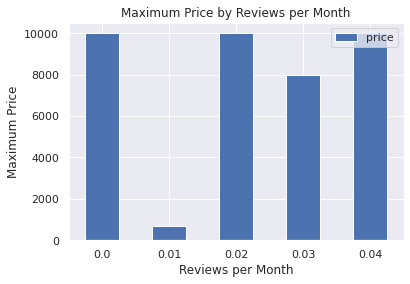

In [ ]:
# plot bar chart
location_rating.plot.bar(x='reviews_per_month', y='price', rot=0) 

# set x and y axis labels
plt.xlabel('Reviews per Month')
plt.ylabel('Maximum Price')

# set plot title
plt.title('Maximum Price by Reviews per Month')

# show plot
plt.show()

In [ ]:
# minimum neights people should pay per hotels
neights=df1.groupby(['minimum_nights','name'])['price'].max().reset_index()
neights.sort_values(by='price',ascending=False).head(5)

,minimum_nights,name,price
48254,100,Furnished room in Astoria apartment,10000
44115,30,1-BR Lincoln Center,10000
37064,5,Luxury 1 bedroom apt. -stunning Manhattan views,10000
48246,99,"Quiet, Clean, Lit @ LES & Chinatown",9999
44215,30,2br - The Heart of NYC: Manhattans Lower East ...,9999


In [ ]:
# most busiest hosts and why?
busiest_host=df1.groupby(['host_name','host_id'])['number_of_reviews'].max().reset_index()
busiest_host.sort_values(by='number_of_reviews',ascending=False).head(10)

,host_name,host_id,number_of_reviews
9887,Dona,47621202,629
17037,Jj,4734398,607
24584,Maya,37312959,543
5997,Carol,2369681,540
8599,Danielle,26432133,510
3799,Asa,12949460,488
36312,Wanda,792159,480
21629,Linda,2680820,474
8285,Dani,42273,467
2834,Angela,23591164,466


Dona,Jj,Maya,Carol,Danielle is the busiest hotels.

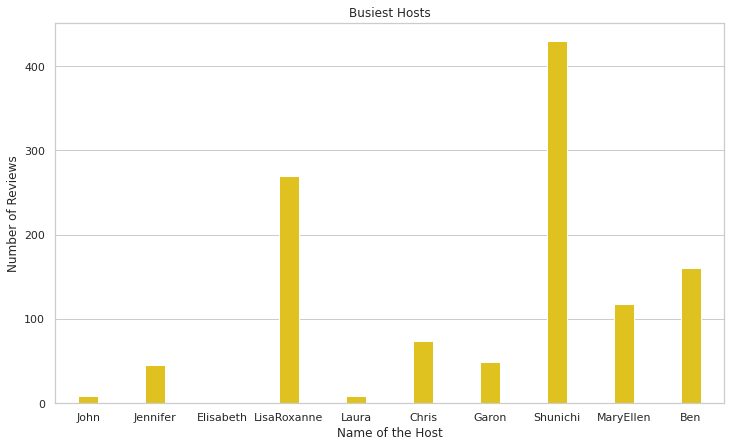

In [ ]:
# Create a bar chart
# Select the data to plot
name = df1['host_name'].head(10)
reviews = df1['number_of_reviews'].head(10)

# Create a bar chart using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.barplot(x=name, y=reviews, color='gold', width=0.3)
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")

plt.show()

Thia graph basically shows the most active host on Airbnb platform because its number of reviews is highest.

In [ ]:
# Which area get highest number of reviews
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews.sort_values('number_of_reviews',ascending=False)

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


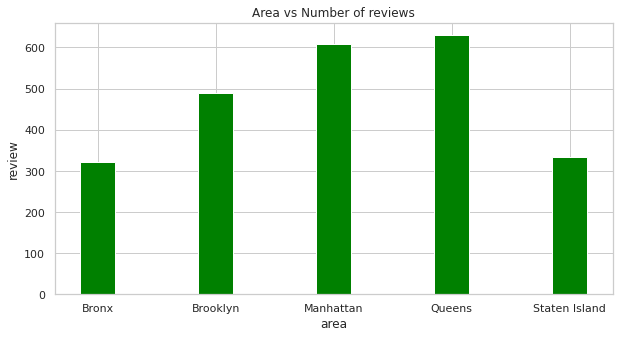

In [ ]:
area=areas_reviews['neighbourhood_group']
review=areas_reviews['number_of_reviews']
fig=plt.figure(figsize=(10,5))
# creating the bar plot
plt.bar(area, review, color ='green', width=0.3)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()


this graph shows which area gets the maximum number of reviews. From this we gave can easily find out the area which is more popular compared to others or this area facility are more likable compared to other ones.

In [ ]:
price_area = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


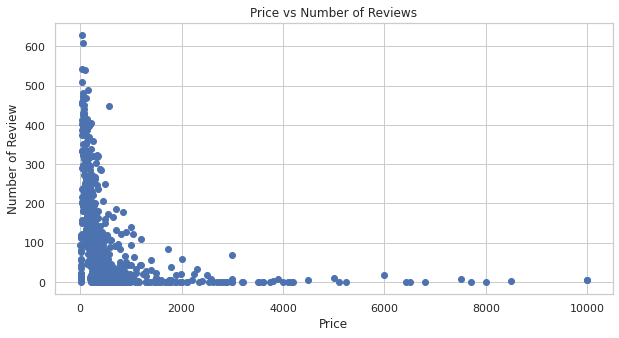

In [ ]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the scatter plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

This graph represents the number of reviews according to their pricing. This basically tells that people love expensive hosts or cheaper ones and according to the graph, we can easily see that most of the hosts like pricing hosts.

In [ ]:
# Distribution of listings across the neighborhood
distribution = df1.groupby(['calculated_host_listings_count'])['neighbourhood'].max().reset_index()
distribution.sort_values(by='neighbourhood',ascending=True).head(5)

,calculated_host_listings_count,neighbourhood
24,27,Bedford-Stuyvesant
35,47,Hell's Kitchen
27,30,Hell's Kitchen
19,20,Hell's Kitchen
23,26,Kips Bay


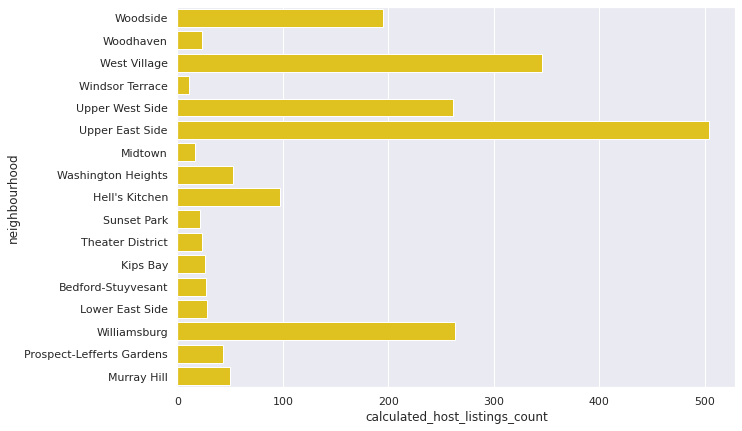

In [ ]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(x="calculated_host_listings_count", y="neighbourhood",data=distribution, estimator=sum, ci=None, color='gold');

According this distributin we can understand that client maximum list Upper East side and Minimum Windsor Terrace

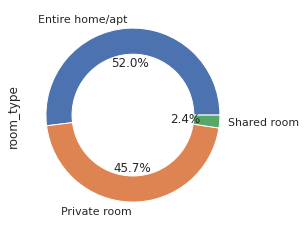

In [ ]:
# Room type availability according to their percentage?
df["room_type"].value_counts().plot(kind = "pie",autopct = "%0.1f%%" )
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

This donut chart tell about availiability of room type in percentage

In [ ]:
# Grouping neighbourhood according to location with pricing
grouped = df1.groupby('neighbourhood_group')

for group_name, group_data in grouped:
    top_3 = group_data.nlargest(3, 'price')
    print(f'Top 3 neighborhoods in {group_name}:')
    print(top_3[['neighbourhood', 'price']])

Top 3 neighborhoods in Bronx:
      neighbourhood  price
24477     Riverdale   2500
48282   City Island   1000
25422     Riverdale    800
Top 3 neighborhoods in Brooklyn:
       neighbourhood  price
17692     Greenpoint  10000
4377    Clinton Hill   8000
45666  East Flatbush   7500
Top 3 neighborhoods in Manhattan:
         neighbourhood  price
29238  Upper West Side  10000
6530       East Harlem   9999
12342  Lower East Side   9999
Top 3 neighborhoods in Queens:
      neighbourhood  price
9151        Astoria  10000
42680       Bayside   2600
17811  Forest Hills   2350
Top 3 neighborhoods in Staten Island:
       neighbourhood  price
22353  Randall Manor   5000
45572   Prince's Bay   1250
6333      St. George   1000


<Figure size 720x360 with 0 Axes>

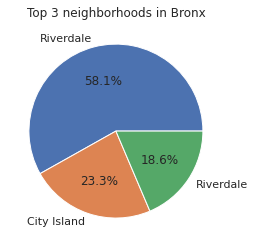

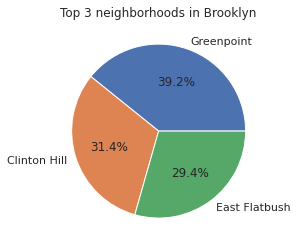

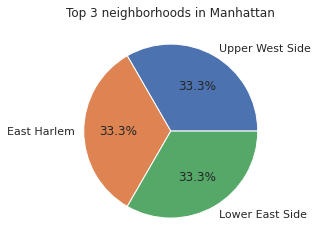

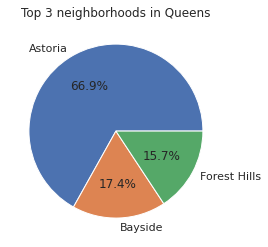

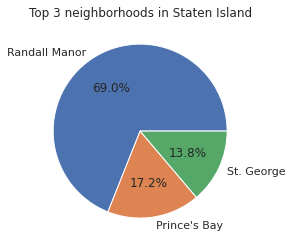

In [ ]:
fig = plt.figure(figsize = (10, 5))
for group_name, group_data in grouped:
    top_3 = group_data.nlargest(3, 'price')

    plt.figure()
    plt.pie(top_3['price'], labels=top_3['neighbourhood'], autopct='%1.1f%%' )
    plt.title(f'Top 3 neighborhoods in {group_name}')
    plt.show()

In [ ]:
# Most demanding Host for Airbnb
host_based_on_review_df = df1.groupby(['host_id','host_name'],as_index=False)['number_of_reviews'].sum()
host_based_on_review_df.sort_values(['number_of_reviews'],ascending = False)
host_based_on_availability_df = df1.groupby(['host_id','host_name'],as_index=False)['availability_365'].mean()
host_based_on_availability_df.sort_values(['availability_365'],ascending = True)
df4 = pd.merge(host_based_on_review_df,host_based_on_availability_df,on = ['host_id','host_name'])
df4.sort_values(['availability_365','number_of_reviews'],ascending = [True,False]).head(5)

,host_id,host_name,number_of_reviews,availability_365
17276,22959695,Gurpreet Singh,1157,0.0
28819,99392252,Michael,732,0.0
30142,121391142,Deloris,693,0.0
1866,792159,Wanda,480,0.0
21420,37818581,Sofia,479,0.0


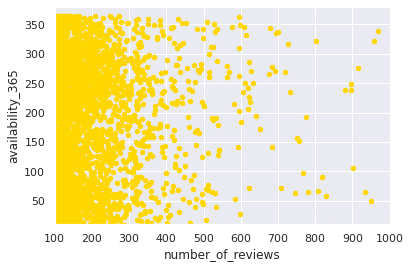

In [ ]:
df4.plot.scatter(x='number_of_reviews', y='availability_365', xlim=(100,1000),ylim=(10,380),color='gold');

In [ ]:
most_active_guest=df1.groupby(['name'])['number_of_reviews'].count()
most_active_guest.sort_values(ascending=False).head(10)

name
Hillside Hotel                                18
Home away from home                           17
No Name                                       16
New york Multi-unit building                  16
Brooklyn Apartment                            12
Private Room                                  11
Loft Suite @ The Box House Hotel              11
Artsy Private BR in Fort Greene Cumberland    10
Private room                                  10
Private room in Brooklyn                       8
Name: number_of_reviews, dtype: int64

As we cann see from this scatter plot that highest number of reviews given by client is to those host who available maximum days.

# **Solution to Business Objective**
To address the business objectives in Airbnb data analysis, several solutions can be proposed. Here are some examples:

Identify popular listing types and amenities to improve engagement and loyalty.

Use dynamic pricing algorithms to optimize pricing and availability for listings.

Manage guest feedback and provide resources for hosts to improve reputation.

Provide support and localized experiences to address challenges and opportunities.

Use data analysis to inform policy and promote sustainable tourism.



# **Conclusion**
1.   The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only
2.   The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
3.   Most people prefer to pay less price.
4.   If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
5.   If people are not staying more then one night means they are travellers.










